# Duration


In RADICAL-Analytics (RA), ``duration`` is a general term to indicate a measure of the time spent by an entity (local analyses) or a set of entities (global analyses) between two timestamps. For example, data staging, scheduling, pre-executing, and executing time of one or more tasks; description, submission and execution time of one or more pipelines or stages; and runtime of one or more pilots.

We show two sets of default durations for RADICAL-Pilot (RP) and how to define arbitrary durations, depending on the specifics of a given analysis. We then see how to plot the most common durations 

## Prologue

Load the Python modules needed to profile and plot a RADICAL-Cybertool (RCT) session.

In [1]:
import tarfile

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import radical.utils as ru
import radical.pilot as rp
import radical.analytics as ra

from radical.pilot import states as rps

1664961118.272 : radical.analytics    : 29256 : 139645572990784 : INFO     : radical.analytics    version: 1.16.0-v1.16.0-24-g1ea17a5@fix-rtd_build


Load the RADICAL Matplotlib style to obtain viasually consistent and publishable-qality plots.

In [2]:
plt.style.use(ra.get_mplstyle('radical_mpl'))

Usually, it is useful to record the stack used for the analysis. 

<div class="alert alert-info">
    
__Note:__ The analysis stack might be different from the stack used to create the session to analyze. Usually, the two stacks must have the same minor release number (Major.Minor.Patch) in order to be compatible.

</div>

In [3]:
! radical-stack

1664961118.768 : radical.analytics    : 29286 : 139976580167488 : INFO     : radical.analytics    version: 1.16.0-v1.16.0-24-g1ea17a5@fix-rtd_build

  python               : /mnt/home/merzky/radical/radical.analytics.devel/ve3/bin/python3
  pythonpath           : 
  version              : 3.8.0
  virtualenv           : /mnt/home/merzky/radical/radical.analytics.devel/ve3

  radical.analytics    : 1.16.0-v1.16.0-24-g1ea17a5@fix-rtd_build
  radical.entk         : 1.16.0-v1.16.0@master
  radical.gtod         : 1.13.0
  radical.pilot        : 1.17.0-v1.17.0-148-g5a63a7f8e@devel
  radical.saga         : 1.17.0-v1.17.0-2-g5b9803bb@devel
  radical.utils        : 1.17.0-v1.17.0-4-ge3c8acb@fix-docs



## Default Durations

Currently, we offer a set of default durations for pilot and task entities of RP.

In [4]:
pd.DataFrame(ra.utils.tabulate_durations(rp.utils.PILOT_DURATIONS_DEBUG))

,Duration Name,Start Timestamp,Stop Timestamp
0,p_pmgr_create,NEW,PMGR_LAUNCHING_PENDING
1,p_pmgr_launching_init,PMGR_LAUNCHING_PENDING,PMGR_LAUNCHING
2,p_pmgr_launching,PMGR_LAUNCHING,staging_in_start
3,p_pmgr_stage_in,staging_in_start,staging_in_stop
4,p_pmgr_submission_init,staging_in_stop,submission_start
5,p_pmgr_submission,submission_start,submission_stop
6,p_pmgr_scheduling_init,submission_stop,PMGR_ACTIVE_PENDING
7,p_pmgr_scheduling,PMGR_ACTIVE_PENDING,bootstrap_0_start
8,p_agent_ve_setup_init,bootstrap_0_start,ve_setup_start
9,p_agent_ve_setup,ve_setup_start,ve_setup_stop


In [5]:
pd.DataFrame(ra.utils.tabulate_durations(rp.utils.TASK_DURATIONS_DEBUG))

,Duration Name,Start Timestamp,Stop Timestamp
0,t_tmgr_create,NEW,TMGR_SCHEDULING_PENDING
1,t_tmgr_schedule_queue,TMGR_SCHEDULING_PENDING,TMGR_SCHEDULING
2,t_tmgr_schedule,TMGR_SCHEDULING,TMGR_STAGING_INPUT_PENDING
3,t_tmgr_stage_in_queue,TMGR_STAGING_INPUT_PENDING,TMGR_STAGING_INPUT
4,t_tmgr_stage_in,TMGR_STAGING_INPUT,AGENT_STAGING_INPUT_PENDING
5,t_agent_stage_in_queue,AGENT_STAGING_INPUT_PENDING,AGENT_STAGING_INPUT
6,t_agent_stage_in,AGENT_STAGING_INPUT,AGENT_SCHEDULING_PENDING
7,t_agent_schedule_queue,AGENT_SCHEDULING_PENDING,AGENT_SCHEDULING
8,t_agent_schedule,AGENT_SCHEDULING,AGENT_EXECUTING_PENDING
9,t_agent_execute_queue,AGENT_EXECUTING_PENDING,AGENT_EXECUTING


Most of those default durations are meant for __debugging__. They are as granular as possible and (almost completely) contiguous. Only few of them are commonly used in experiment analyses. For example:

- __p_agent_runtime__: the amount of time for which one or more pilots (i.e., RP Agent) were active.
- __p_pmngr_scheduling__: the amount of time one or more pilots waited in the queue of the HPC batch system.
- __t_agent_stage_in__: the amount of time taken to stage the input data of one or more tasks.
- __t_agent_schedule__: the amount of time taken to schedule of one or more tasks.
- __t_agent_t_pre_execute__: the amount of time taken to execute the ``pre_exec`` of one or more tasks.
- __t_agent_t_execute__: the amount of time taken to execute the executable of one or more tasks.
- __t_agent_t_stage_out__: the amount of time taken to stage the output data of one or more tasks.

## Arbitrary Durations

RA enables the __arbitrary__ definition of durations, depending on the analysis requirements. For example, given an experiment to characterize the performance of one of RP's executors, it might be useful to measure the amount of time spent by each task in RP's Executor component. 

<div class="alert alert-warning">
    
__Warning:__ Correctly defining a duration requires a __detailed__ understanding of both [RP architecture](https://github.com/radical-cybertools/radical.pilot/wiki/Architecture) and [event model](https://github.com/radical-cybertools/radical.pilot/blob/devel/docs/source/events.md). 

</div>

Once we acquired an understanding of RP architecture and event model, we can define our duration as the sum of the time spent by tasks in RP's Executor component, before and after the execution of the tasks' executable.

In [6]:
t_executor_before = [{ru.STATE: rps.AGENT_EXECUTING},
                     {ru.EVENT: 'rank_start'} ]

t_executor_after  = [{ru.EVENT: 'rank_stop'}, 
                     {ru.EVENT: 'task_run_stop'} ]

## Duration Analysis

Every analysis with RA requires to load the traces produced by RP or RADICAL-EnsembleToolkit (EnTK) into a session object. Both RP and EnTK write traces (i.e., timestamped and annotated sequences of events) to a  directory called ``client sandbox``. This directory is created inside the directory from which the application executed. The name of the client sandbox is a session ID, e.g., ``rp.session.hostname.username.000000.0000`` for RP and ``en.session.hostname.username.000000.0000`` for EnTK.

### Session

Name and location of the session we profile.

In [7]:
sid  = 'rp.session.rivendell.merzky.019270.0003'
sdir = 'sessions/'

Unbzip and untar the session.

In [8]:
sp  = sdir + sid + '.tar.bz2'
tar = tarfile.open(sp, mode='r:bz2')
tar.extractall(path=sdir)
tar.close()

Create a ``ra.Session`` object for the session. We do not need EnTK-specific traces so load only the RP traces contained in the EnTK session. Thus, we pass the ``'radical.pilot'`` session type to ``ra.Session``.

<div class="alert alert-warning">
    
__Warning:__ We already know we need information about pilots and tasks. Thus, we save in memory two session objects filtered for pilots and tasks. This might be too expensive with large sessions, depending on the amount of memory available.

</div>
    
<div class="alert alert-info">
    
__Note:__ We save the ouput of ``ra.Session`` in ``capt`` to avoid polluting the notebook with warning messages. 

</div>

In [9]:
%%capture capt

sp = sdir + sid

session = ra.Session(sp, 'radical.pilot')
pilots  = session.filter(etype='pilot', inplace=False)
tasks   = session.filter(etype='task' , inplace=False)

As seen above, each duration measures the time spent by an entity (local analyses) or a set of entities (global analyses) between two timestamps.

We starts with a global analysis to measure for how long all the pilots of a session have been active. Looking at RP's [event model](https://github.com/radical-cybertools/radical.pilot/blob/devel/docs/source/events.md#bootstrap_0sh) of the ``pilot`` entity and to ``rp.utils.PILOT_DURATIONS_DEBUG``, we know that a pilot is active between the events ``bootstrap_0_start`` and ``bootstrap_0_stop``. We also know that we have a default duration with those events: ``p_agent_runtime``.

To measure that duration, first, we filter the session object so to keep only the entities of type Pilot; and, second, we get the __cumulative__ amount of time for which all the pilot were active. It is that cumulative measure that defines this analysis as global.

In [10]:
p_runtime = pilots.duration(event=rp.utils.PILOT_DURATIONS_DEBUG['p_agent_runtime'])
p_runtime

54.0

<div class="alert alert-info">
    
__Note:__ `ra.session.duration` works with a set of pilots, including the case in which we have a single pilot. If we have a single pilot, the cumulative active time of all the pilots is equal to the active time of the only available pilot.

</div>

If we have more than one pilot and we want to measure the active time of only one of them, then we need to perform a local analysis. A rapid way to get a list of all the pilot entities in the session and, for example, see their unique identifiers (uid) is:

In [11]:
puids = [p.uid for p in pilots.get()]
puids

['pilot.0000']

Once we know the ID of the pilot we want to analyze, first we filter the session object so to keep only the pilot we want to analyze; and, second, we get the amount of time for which that specific pilot was active:

In [12]:
p0000 = pilots.filter(uid='pilot.0000')
p0000_runtime = p0000.duration(event=rp.utils.PILOT_DURATIONS_DEBUG['p_agent_runtime'])
p0000_runtime

54.0

The same approach and both global and local analyses can be used for every type of entity supported by RA (currently: pilot, task, pipeline, and stage). 

Total task execution time (TTX) and RCT overheads (OVH) are among the most common metrics used to describe the global behavior of RCT. TTX measures the time taken by __ALL__ the tasks to execute, accounting for their cocurrency. This means that if ``Task_a`` and ``task_b`` both start at the same time and ``Task_a`` terminates after 10 minutes and ``Task_b`` after 15, TTX will be 15 minutes. Conversely, if ``task_b`` starts to execute 5 minutes after ``task_a``, TTX will be 20 minutes. Finally, if ``task_b`` starts to execute 10 minutes after ``task_a`` terminated, TTX will be 25 minutes as the gap between the two tasks will not be considered.

In [13]:
ttx = tasks.duration(event=rp.utils.TASK_DURATIONS_DEBUG['t_agent_lm_execute'])
ovh = p_runtime - ttx

print('TTX: %f\nOVH: %f' % (ttx, ovh))

TTX: 40.633106
OVH: 13.366894


### Plotting

We plot TTX and OVH for 4 sessions of an experiment. We create suitable data structures to suppor the plotting and we produce a figure with 4 subplots.

In [14]:
sids = ['rp.session.rivendell.merzky.019270.0000',
        'rp.session.rivendell.merzky.019270.0001',
        'rp.session.rivendell.merzky.019270.0002',
        'rp.session.rivendell.merzky.019270.0003']
sdir = 'sessions/'
sessions = [sdir + s for s in sids]

Unbzip and untar those sessions.

In [15]:
for sid in sids:
    sp = sdir + sid + '.tar.bz2'
    tar = tarfile.open(sp, mode='r:bz2')
    tar.extractall(path=sdir)
    tar.close()

Create the session, tasks and pilots objects for each session.

In [16]:
# %%capture capt

ss = {}
for sid in sids:
    sp = sdir + sid
    ss[sid] = {'s': ra.Session(sp, 'radical.pilot')}
    ss[sid].update({'p': ss[sid]['s'].filter(etype='pilot'   , inplace=False),
                    't': ss[sid]['s'].filter(etype='task'    , inplace=False)})

Derive the information about each session we need to use in our plots.

In [17]:
for sid in sids:
    ss[sid].update({'cores_node': ss[sid]['s'].get(etype='pilot')[0].cfg['resource_details']['rm_info']['cores_per_node'],
                    'pid'       : ss[sid]['p'].list('uid'),
                    'ntask'     : len(ss[sid]['t'].get())
    })
    
    ss[sid].update({'ncores'    : ss[sid]['p'].get(uid=ss[sid]['pid'])[0].description['cores'],
                    'ngpus'     : ss[sid]['p'].get(uid=ss[sid]['pid'])[0].description['gpus']
    })
    
    ss[sid].update({'nnodes'    : int(ss[sid]['ncores']/ss[sid]['cores_node'])})

Use the default global durations to calculate TTX and OVH for each session of the experiment.

In [18]:
for sid in sids:
    t  = ss[sid]['t']
    p  = ss[sid]['p']

    ss[sid].update({
      'ttx': t.duration( event=rp.utils.TASK_DURATIONS_DEBUG['t_agent_lm_execute']),
      'p_runtime': p.duration(event=rp.utils.PILOT_DURATIONS_DEBUG['p_agent_runtime'])
    })
    
    ss[sid].update({'ovh': ss[sid]['p_runtime'] - ss[sid]['ttx']})

Plot TTX and OVH for each session, add information about each run and letters for each subplot fo easy referencing in a paper.

findfont: Font family ['[DeJavu serif]'] not found. Falling back to DejaVu Sans.


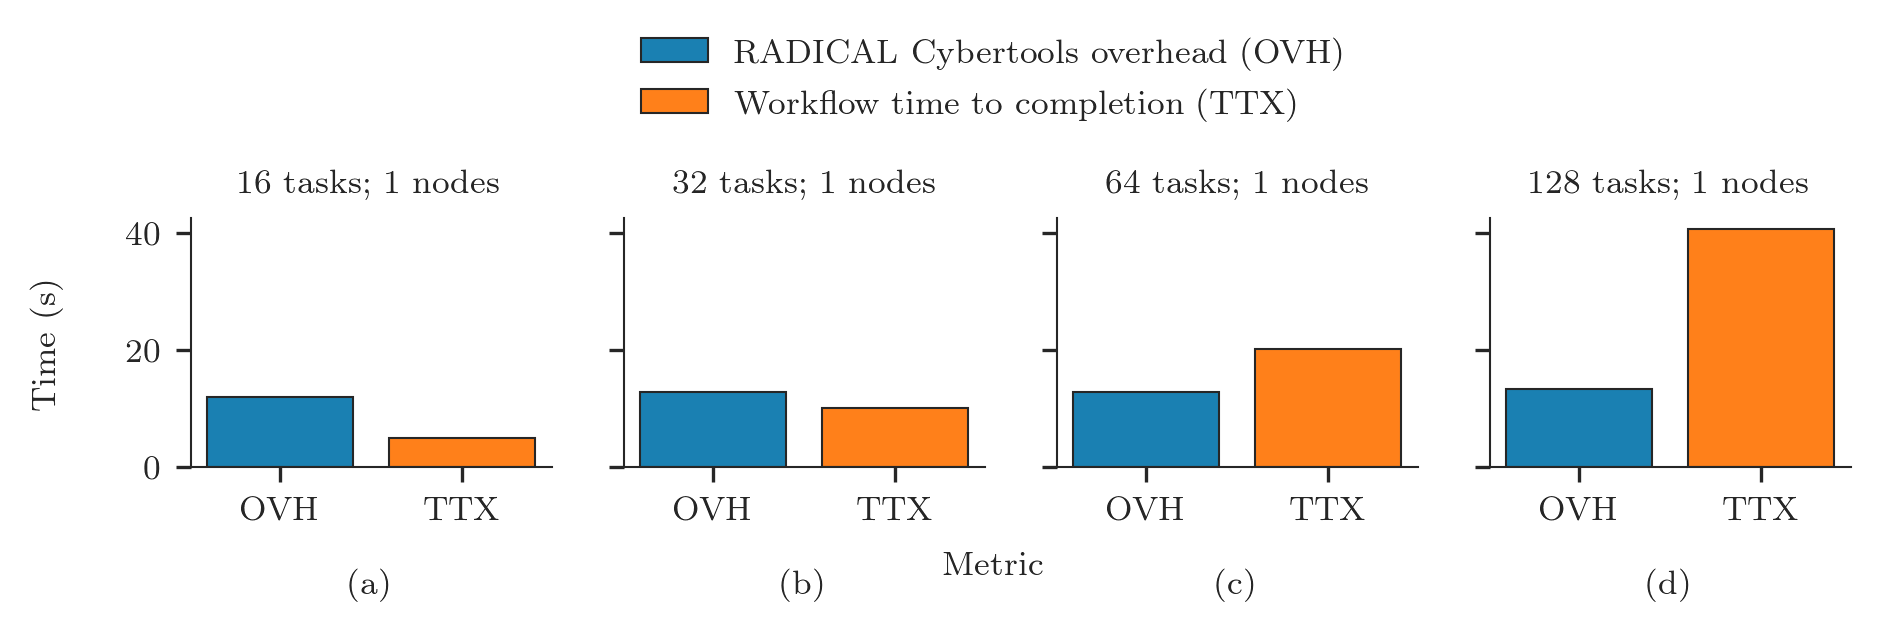

In [19]:
nsids = len(sids)

fwidth, fhight = ra.get_plotsize(516,subplots=(1, nsids))
fig, axarr = plt.subplots(1, nsids, sharey=True, figsize=(fwidth, fhight))

i = 0
j = 'a'
for sid in sids:

    if len(sids) > 1:
        ax = axarr[i]
    else:
        ax = axarr
    
    ax.title.set_text('%s tasks; %s nodes' % (ss[sid]['ntask'], int(ss[sid]['nnodes'])))

    ax.bar(x = 'OVH', height = ss[sid]['ovh'])
    ax.bar(x = 'TTX', height = ss[sid]['ttx'])

    ax.set_xlabel('(%s)' % j, labelpad=10)

    i = i + 1
    j = chr(ord(j) + 1)

fig.text(  0.05,  0.5 , 'Time (s)', va='center', rotation='vertical')
fig.text(  0.5 , -0.2, 'Metric'  , ha='center')
fig.legend(['RADICAL Cybertools overhead (OVH)', 
            'Workflow time to completion (TTX)'], 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.5), 
           ncol=1)

## Danger of Duration Analysis

<div class="alert alert-warning">
    
__Warning:__ Most of the time, the durations of __global analyses__ are __NOT__ additive. 

</div>
    
For example, the sum of the total time taken by RP Agent to manage all the tasks and the total amount of time taken to execute all those tasks is __greater__ than the time taken to execute the workload. This is because RP is a distributed system that performs multiple operations at the same time on multiple resources. Thus, while RP Agent manages a task, it might be executing another task.

Consider three durations:

1. __t_agent_t_load__: the time from when RP Agent receives a compute task to the time in which the compute task's executable is launched.
2. __t_agent_t_execute__: default duration for the time taken by a compute task's executable to execute.
3. __t_agent_t_load__: the time from when a compute task's executable finishes to execute to when RP Agent mark the compute task with a final state (DONE, CANCELED or FAILED).

For a single task, ``t_agent_t_load``, ``t_agent_t_execute`` and ``t_agent_t_load`` are contiguos and therefore additive. A single task cannot be loaded by RP Agent while it is also executed. For multiple tasks, this does not apply: one task might be loaded by RP Agent while another task is being executed.

## Distribution of Durations

We want to calculate the statistical distribution of default and arbitrary durations. Variance and outliers characterize the runtime behavior of both tasks and RCT.

Global durations like TTX and OVH are aggregated across all entities: TTX aggregates the duration of each task while OVH that of all the RCT components active when no tasks are executed. For a distribution, we need instead the individual measure for each entity and component. For example, to calculate the distribution of task execution time, we have to measure the execution time of each task.

We use RA to cycle through all the task entities and then the `get` and `duration` methods to return the wanted duration for each task. We use both the default duration for task runtime and the two arbitary durations we defined above for the time taken by RP executor to manage the execution of the task.

In [20]:
t_duration = {}
events = {'tx': rp.utils.TASK_DURATIONS_DEBUG['t_agent_lm_execute'], 
          't_executor_before': t_executor_before, 
          't_executor_after': t_executor_after}

for sid in sids:
    t_duration[sid] = {}
    for name, event in events.items():
        t_duration[sid].update({name: []})    
        for tid in ss[sid]['t'].list('uid'):
            task = ss[sid]['t'].get(etype='task', uid=tid)[0]
            duration = task.duration(event=event)
            t_duration[sid][name].append(duration)

We can now plot the distribution of task execution time as a boxplot for each session:

Text(0, 0.5, 'Task Runtime (s)')

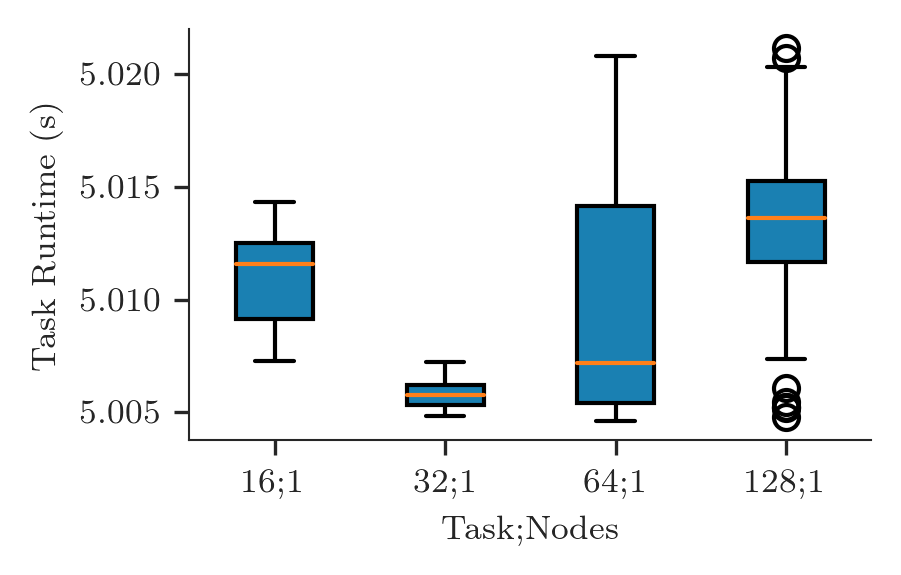

In [21]:
fwidth, fhight = ra.get_plotsize(212)
fig, ax = plt.subplots(figsize=(fwidth, fhight))

data   = [t_duration[sid]['tx'] for sid in sids]
labels = ['%s;%s' % (ss[sid]['ntask'], int(ss[sid]['nnodes'])) for sid in sids]

ax.boxplot(data, labels=labels, patch_artist=True)

ax.set_xlabel('Task;Nodes')
ax.set_ylabel('Task Runtime (s)')

We can do the same for the arbitrary durations defined above: `t_executor_before` and `t_executor_after`

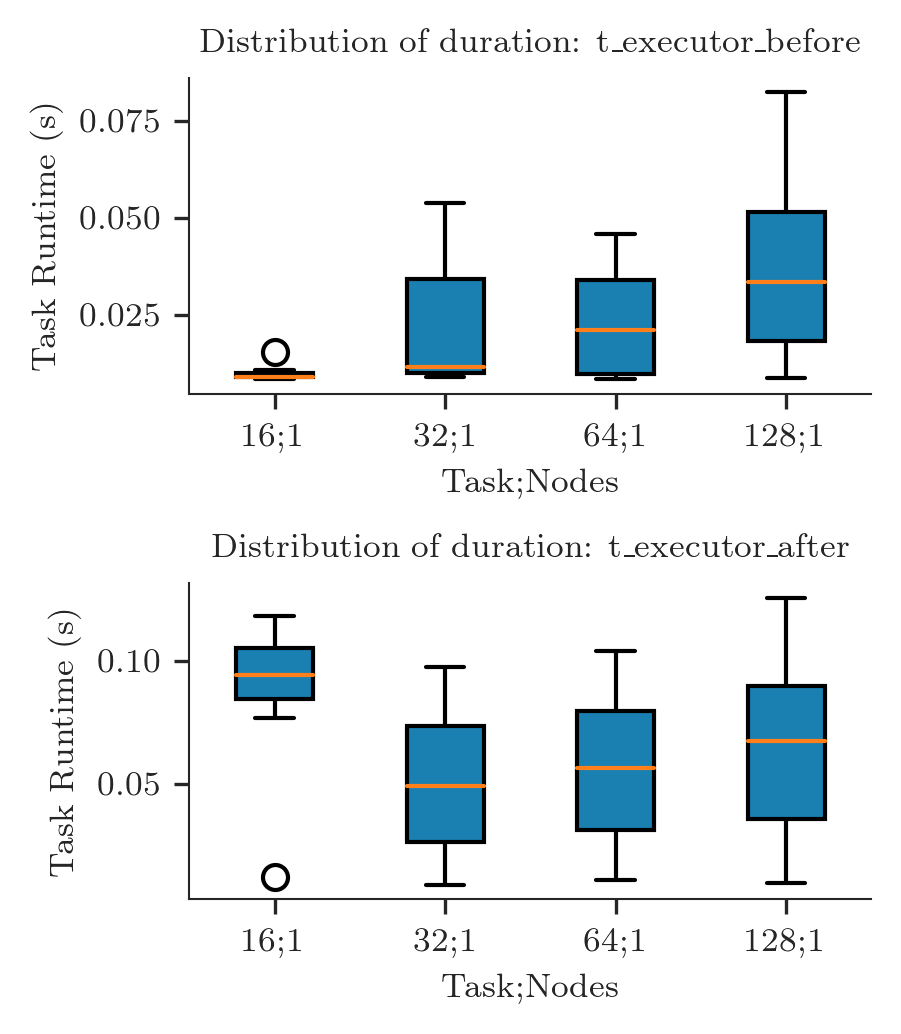

In [22]:
fwidth, fhight = ra.get_plotsize(212, subplots=(2, 1))
fig, axarr = plt.subplots(2, 1, figsize=(fwidth, fhight))
plt.subplots_adjust(hspace=0.6)

i = 0
for dname in ['t_executor_before', 't_executor_after']:
    ax = axarr[i]

    data   = [t_duration[sid][dname] for sid in sids]
    labels = ['%s;%s' % (ss[sid]['ntask'], int(ss[sid]['nnodes'])) for sid in sids]

    ax.boxplot(data, labels=labels, patch_artist=True)

    ax.set_title('Distribution of duration: %s' % ra.to_latex(dname))
    ax.set_xlabel('Task;Nodes')
    ax.set_ylabel('Task Runtime (s)')
    
    i += 1
    